The data for this week is provider information, which includes lots of healthcare information as well as a target variable called "OVERALL_RATING." This is a multiclass problem as OVERALL_RATING has five different classes (1, 2, 3, 4, 5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
import warnings
warnings.filterwarnings("ignore")

# Data Processing: 

a) Import the data: Only keep numeric data (pandas has tools to do this!). Drop "PHONE" and "COUNTRY_SSA" as well.

b) This data is extra messy and has some NaN and NaT values. NaT values should be replaced by "np.nan." After this step, remove any rows that have an NaN value. The example below replaces NaN and NaT with 'nan', which is easier to than drop.

> dataframe.replace(["NaN", 'NaT'], np.nan, inplace=True)

> cleaned_df = dataframe.dropna(how='any', axis=0)

c) Split into train / test set using an 80/20 split.

d) Scale all input features (NOT THE TARGET VARIABLE). Feel free to use the sklearn tool "StandardScaler" — more info here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [3]:
provider_df = pd.read_csv("ProviderInfo.csv")

provider_df_num = provider_df.select_dtypes(["number"])

provider_df_num.drop(["PHONE", "COUNTY_SSA"], axis=1, inplace=True)

provider_df_num.replace(["NaN", "NaT"], np.nan, inplace=True)
provider_clean_df = provider_df_num.dropna(how="any", axis=0)

X_train, X_test, y_train, y_test = train_test_split(
    provider_clean_df.drop(["OVERALL_RATING"], axis=1),
    provider_clean_df["OVERALL_RATING"], test_size=.20,
    random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model #1: Logistic Regression

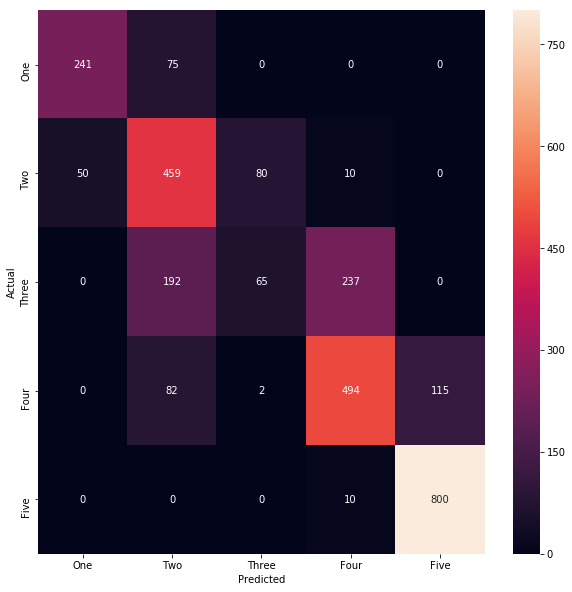

             precision    recall  f1-score   support

        One       0.83      0.76      0.79       316
        Two       0.57      0.77      0.65       599
      Three       0.44      0.13      0.20       494
       Four       0.66      0.71      0.68       693
       Five       0.87      0.99      0.93       810

avg / total       0.68      0.71      0.68      2912



In [3]:
logit_mod = LogisticRegression(multi_class="ovr").fit(X_train, y_train)

y_train_pred = logit_mod.predict(X_train)
y_test_pred = logit_mod.predict(X_test)

labels_df = provider_clean_df.loc[:,
            provider_clean_df.columns == "OVERALL_RATING"]
labels = labels_df.drop_duplicates(
).sort_values("OVERALL_RATING")
labels = labels.assign(label=["One", "Two", "Three", "Four", "Five"])

conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=labels.label.values,
            yticklabels=labels.label.values)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print(metrics.classification_report(y_test, y_test_pred,
                                    target_names=labels.label.values))

# Model #2: PCA(n_components = 2) + Logistic Regression

a) Pick up from step d in Problem 1 (use the same data that has been scaled): We will now transform the X_train & X_test data using PCA with 2 components. 

    Example: 

> from sklearn.decomposition import PCA

> pca_two = PCA(n_components=2)

> use pca object to fit & apply pca transformation to data

> X_train_pca = pca_two.fit_transform(X_train_scaled)

b) Then use the transformed data (X_train_pca) to fit a Logistic Regression model.

c) Calculate the same error metrics as those from Model #1.

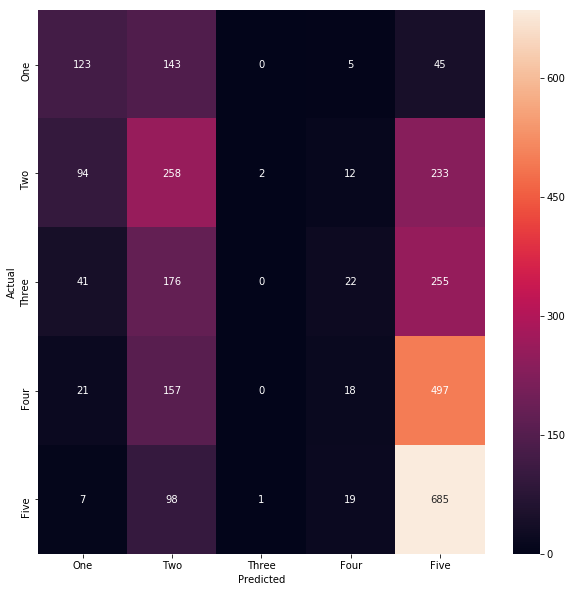

             precision    recall  f1-score   support

        One       0.43      0.39      0.41       316
        Two       0.31      0.43      0.36       599
      Three       0.00      0.00      0.00       494
       Four       0.24      0.03      0.05       693
       Five       0.40      0.85      0.54       810

avg / total       0.28      0.37      0.28      2912



In [4]:
# limit PCA object to 2 components
pca_two = PCA(n_components=2).fit(X_train)

# use pca object to fit & apply pca transformation to data
X_train_pca2 = pca_two.transform(X_train)
X_test_pca2 = pca_two.transform(X_test)

logit_mod_pca = LogisticRegression(multi_class="ovr").fit(X_train_pca2, y_train)
y_test_pred_pca2 = logit_mod_pca.predict(X_test_pca2)

conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred_pca2)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=labels.label.values,
            yticklabels=labels.label.values)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print(metrics.classification_report(y_test, y_test_pred_pca2,
                                    target_names=labels.label.values))

# Model #3: PCA(n_components = 16) + Logistic Regression

a) Pick up from step d in Problem 1 (use the same data that has been scaled): We will now transform the X_train & X_test data using PCA with 16 components. 

b) Then use the transformed data (X_train_pca) to fit a Logistic Regression model.

c) Calculate the same error metrics as those from Model #1.

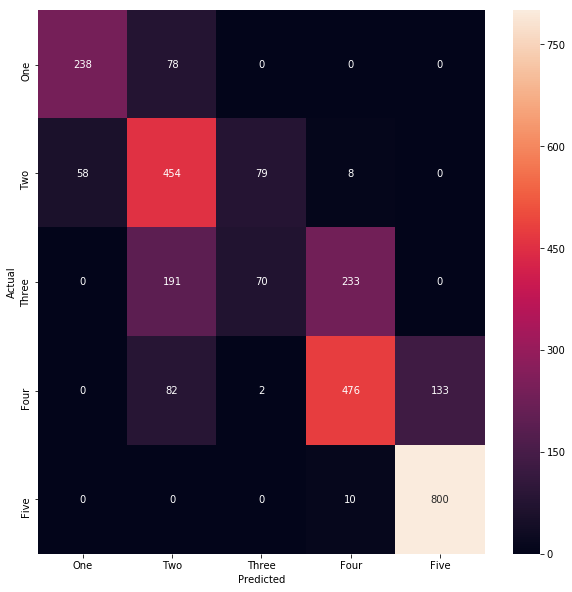

             precision    recall  f1-score   support

        One       0.80      0.75      0.78       316
        Two       0.56      0.76      0.65       599
      Three       0.46      0.14      0.22       494
       Four       0.65      0.69      0.67       693
       Five       0.86      0.99      0.92       810

avg / total       0.68      0.70      0.67      2912



In [5]:
pca_sixteen = PCA(n_components=16).fit(X_train)

# use pca object to fit & apply pca transformation to data
X_train_pca16 = pca_sixteen.transform(X_train)
X_test_pca16 = pca_sixteen.transform(X_test)

logit_mod_pca = LogisticRegression(multi_class="ovr").fit(X_train_pca16,
                                                          y_train)
y_test_pred_pca16 = logit_mod_pca.predict(X_test_pca16)

conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred_pca16)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=labels.label.values,
            yticklabels=labels.label.values)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print(metrics.classification_report(y_test, y_test_pred_pca16,
                                    target_names=labels.label.values))

# Between Model #2 and Model #3, which performed the best?

Performance metrics were stronger for the 16 principal component model (and very similar to non-pca logistic). Though it is not guranteed and largely dependent on the distribution of variance explained across principal componenets, better performance is expected as more principal components are included in the model.